In [5]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [7]:
df = pd.read_csv("realtime_fraud_datasets.csv")

In [8]:
df.head()

,txn_id,user_id,amount,merchant,country,card_present,device_type,timestamp,velocity_1h,is_international,label
0,1,861,206.12,Walmart,FR,0,mobile,01-01-2024 00:00,0,1,0
1,2,3773,181.24,Myntra,UK,0,mobile,01-01-2024 00:01,2,0,0
2,3,3093,169.44,Target,SG,0,pos,01-01-2024 00:02,1,1,0
3,4,467,166.40,Walmart,BR,1,web,01-01-2024 00:03,5,0,0
4,5,4427,131.25,Flipkart,DE,0,mobile,01-01-2024 00:04,4,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   txn_id            100000 non-null  int64  
 1   user_id           100000 non-null  int64  
 2   amount            100000 non-null  float64
 3   merchant          100000 non-null  object 
 4   country           100000 non-null  object 
 5   card_present      100000 non-null  int64  
 6   device_type       100000 non-null  object 
 7   timestamp         100000 non-null  object 
 8   velocity_1h       100000 non-null  int64  
 9   is_international  100000 non-null  int64  
 10  label             100000 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 8.4+ MB


In [10]:
df.columns

Index(['txn_id', 'user_id', 'amount', 'merchant', 'country', 'card_present',
       'device_type', 'timestamp', 'velocity_1h', 'is_international', 'label'],
      dtype='object')

In [11]:
df["label"].value_counts()

label
0    85668
1    14332
Name: count, dtype: int64

In [12]:
df["is_international"].value_counts()

is_international
0    85038
1    14962
Name: count, dtype: int64

In [13]:
df["card_present"].value_counts()

card_present
0    60102
1    39898
Name: count, dtype: int64

In [14]:
df.isnull().sum()

txn_id              0
user_id             0
amount              0
merchant            0
country             0
card_present        0
device_type         0
timestamp           0
velocity_1h         0
is_international    0
label               0
dtype: int64

In [15]:
df.shape

(100000, 11)

In [16]:
df.shape[0]

100000

In [17]:
round((df["label"].value_counts()[1]/ df.shape[0]) *100, 2)

np.float64(14.33)

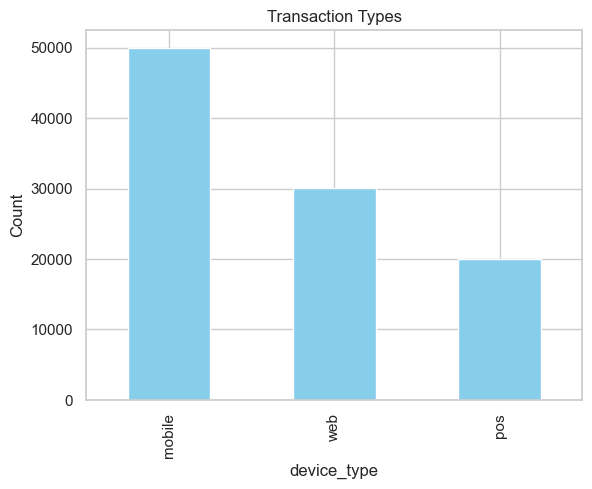

In [18]:
df ["device_type"].value_counts().plot(kind="bar", title="Transaction Types", color = "skyblue")
plt.xlabel("device_type")
plt.ylabel("Count")
plt.show()

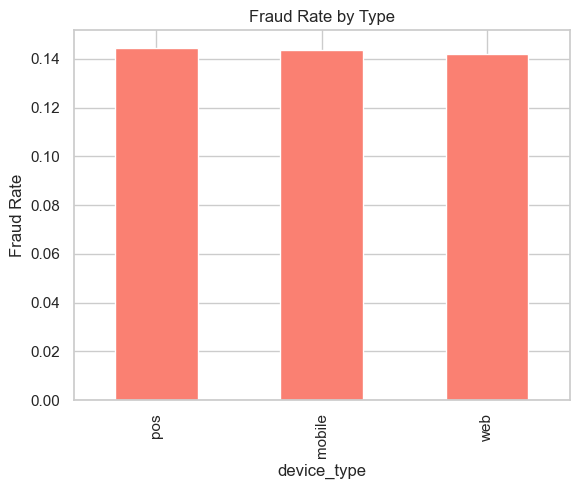

In [19]:
fraud_by_type = df.groupby("device_type") ["label"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon") 
plt.ylabel("Fraud Rate")
plt.show()

In [20]:
fraud_by_type

device_type
pos       0.144495
mobile    0.143741
web       0.141841
Name: label, dtype: float64

In [21]:
df["amount"].describe() #.astype(int)

count    100000.000000
mean        199.117279
std          80.101285
min         119.000000
25%         141.990000
50%         174.600000
75%         229.800000
max        1058.310000
Name: amount, dtype: float64

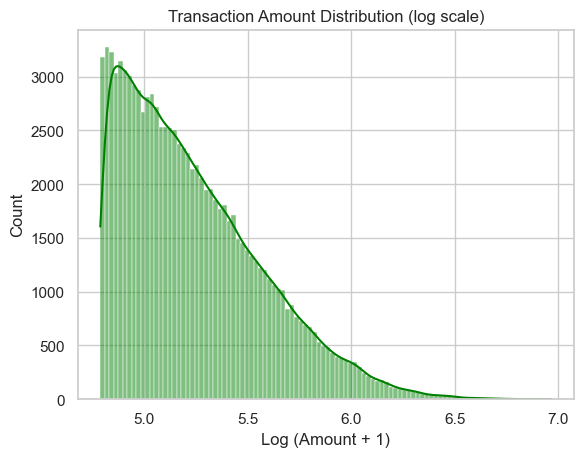

In [22]:
sns.histplot(np.log1p(df ["amount"]), bins=100, kde = True, color = "green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log (Amount + 1)")
plt.show()

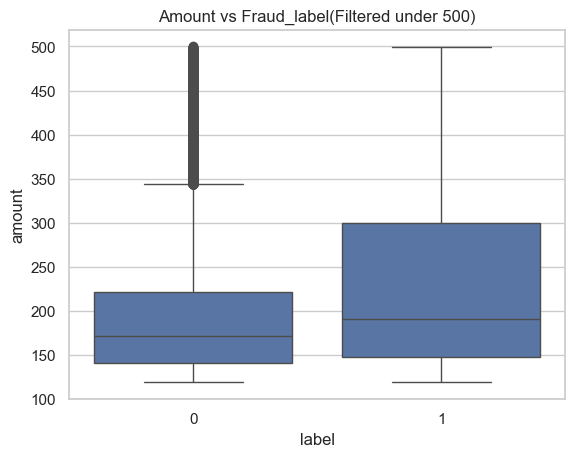

In [23]:
sns.boxplot(data= df [df ["amount"] < 500], x = "label", y="amount") 
plt.title("Amount vs Fraud_label(Filtered under 500)") 
plt.show()

In [24]:
df.head(2)

,txn_id,user_id,amount,merchant,country,card_present,device_type,timestamp,velocity_1h,is_international,label
0,1,861,206.12,Walmart,FR,0,mobile,01-01-2024 00:00,0,1,0
1,2,3773,181.24,Myntra,UK,0,mobile,01-01-2024 00:01,2,0,0


In [25]:
print(df.columns)

Index(['txn_id', 'user_id', 'amount', 'merchant', 'country', 'card_present',
       'device_type', 'timestamp', 'velocity_1h', 'is_international', 'label'],
      dtype='object')


In [26]:
top_senders=df["user_id"].value_counts().head(10)
top_senders

user_id
3332    37
4840    36
2368    36
4714    36
2512    35
4310    35
2666    35
4720    35
2157    35
988     35
Name: count, dtype: int64

In [28]:
top_receivers= df["country"].value_counts().head(10)

In [29]:
top_receivers

country
UK    12614
AU    12612
IN    12511
SG    12470
DE    12461
BR    12453
US    12452
FR    12427
Name: count, dtype: int64

In [30]:
#top 10 fraud making user
fraud_user= df[df["label"]==1]["user_id"].value_counts().head(10)
fraud_user

user_id
4269    12
3257    10
3802    10
394     10
4964    10
3645     9
304      9
3332     9
2709     9
1992     9
Name: count, dtype: int64

In [31]:
fraud_types= df[df["device_type"].isin(["mobile","pos","web"])]

In [32]:
fraud_types["device_type"].value_counts()           #.head()

device_type
mobile    49944
web       30083
pos       19973
Name: count, dtype: int64

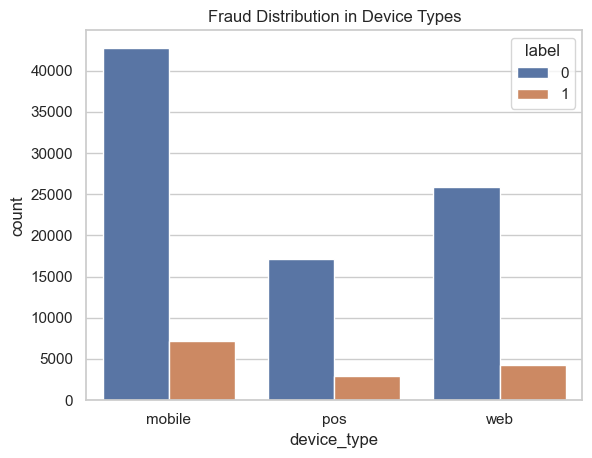

In [33]:
sns.countplot(data=fraud_types, x="device_type", hue="label")
plt.title("Fraud Distribution in Device Types")
plt.show()

In [34]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
cat_cols = ['merchant', 'country', 'device_type']

for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

In [37]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [38]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday


In [39]:
pd.to_datetime(df['timestamp'], errors='coerce').isna().sum()


np.int64(51840)

In [40]:
df[df['timestamp'].apply(lambda x: pd.to_datetime(x, errors='coerce')).isna()]
#To see the invalid rows which rows have corrupted timestamps.

,txn_id,user_id,amount,merchant,country,card_present,device_type,timestamp,velocity_1h,is_international,label,hour,day,weekday
17280,17281,4907,136.04,2,3,1,0,NaT,0,0,0,NaN,NaN,NaN
17281,17282,28,231.74,0,6,0,2,NaT,0,0,0,NaN,NaN,NaN
17282,17283,3492,250.44,4,6,0,2,NaT,4,0,0,NaN,NaN,NaN
17283,17284,4262,264.92,1,3,0,0,NaT,3,1,1,NaN,NaN,NaN
17284,17285,1174,119.68,0,7,0,0,NaT,2,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,86396,1804,139.09,3,6,0,0,NaT,3,1,0,NaN,NaN,NaN
86396,86397,4815,165.14,4,0,1,0,NaT,2,0,0,NaN,NaN,NaN
86397,86398,2360,145.93,5,4,0,0,NaT,1,0,0,NaN,NaN,NaN
86398,86399,4419,201.38,1,2,1,0,NaT,2,1,0,NaN,NaN,NaN


In [41]:
# Convert timestamp even if mixed/invalid formats exist
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Now extract time features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday


In [43]:
df['timestamp'].head(20)

0    2024-01-01 00:00:00
1    2024-01-01 00:01:00
2    2024-01-01 00:02:00
3    2024-01-01 00:03:00
4    2024-01-01 00:04:00
5    2024-01-01 00:05:00
6    2024-01-01 00:06:00
7    2024-01-01 00:07:00
8    2024-01-01 00:08:00
9    2024-01-01 00:09:00
10   2024-01-01 00:10:00
11   2024-01-01 00:11:00
12   2024-01-01 00:12:00
13   2024-01-01 00:13:00
14   2024-01-01 00:14:00
15   2024-01-01 00:15:00
16   2024-01-01 00:16:00
17   2024-01-01 00:17:00
18   2024-01-01 00:18:00
19   2024-01-01 00:19:00
Name: timestamp, dtype: datetime64[ns]

In [44]:
pip install jsonschema



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
schema = json.load(open("Schemas\schema.json"))


In [4]:
#CURRENT working directory.
import os
os.getcwd()

'c:\\Users\\HP\\OneDrive\\Desktop\\Fraud Detection project'

In [6]:
schema = json.load(open("Schemas\schema.json"))


In [7]:
from pathlib import Path
import json

schema_path = Path("Schemas\schema.json").resolve()
print("Schema Path:", schema_path)

with open(schema_path, "r") as f:
    schema = json.load(f)


Schema Path: C:\Users\HP\OneDrive\Desktop\Fraud Detection project\Schemas\schema.json


In [12]:
import json
from pathlib import Path
from jsonschema import validate, ValidationError

schema_file = Path("Schemas\schema.json")

# Load JSON schema
with open(schema_file, "r") as f:
    schema = json.load(f)

sample = {
    "txn_id": "123",
    "timestamp": "2025-05-01T12:34:00Z",
    "user_id": "u567",
    "amount": 100.0,
    "merchant": "Amazon",
    "country": "IN",
    "card_present": 0,
    "device_type": "mobile",
    "velocity_1h": 1,
    "is_international": 0,
    "label": 0
}

# Validate
try:
    validate(instance=sample, schema=schema)
    print("OK")
except ValidationError as e:
    print("Invalid:", e)


OK
